## **Support Vector Classifier Implementation:-**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  

In [100]:
from sklearn.datasets import make_classification

In [101]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

In [102]:
pd.DataFrame(x)[0]

0     -0.025562
1      0.346436
2      0.529468
3     -0.922301
4      1.687869
         ...   
995   -0.478523
996   -0.220950
997   -1.406695
998   -1.478210
999    0.061939
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

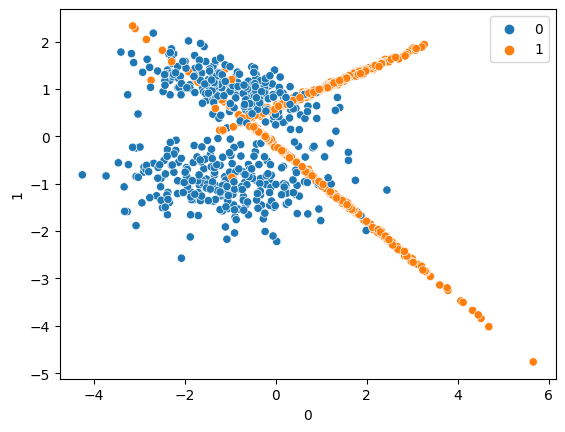

In [103]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [106]:
from sklearn.svm import SVC

In [107]:
svc=SVC(kernel="linear")

In [108]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [109]:
svc.coef_

array([[1.25425338, 0.28881573]])

In [110]:
y_pred=svc.predict(x_test)

In [111]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1])

In [112]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [113]:
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("confusion matrics:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy_score: 0.835
confusion matrics:
 [[75 15]
 [18 92]]
classification report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        90
           1       0.86      0.84      0.85       110

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



### **Hyperparameter tuning:-**

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid ={
    "C":[0,1,1,10,100,1000],
    "gamma":[1,0.1,0.01,0.001,0.0001],
    "kernel":["linear"]
}

In [116]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3 )

In [117]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END ......C=0, gamma=0.01, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END ......C=0, gamma=0.01, kernel=line

[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.819 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.850 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.856 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.825 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.819 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.850 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.856 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.825 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.819 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.850 total time=   0.0s
[CV 5/5] END ...C=10, gamma=

C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_p

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [118]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [119]:
y_pred4=grid.predict(x_test)
print(classification_report(y_pred4,y_test))
print(confusion_matrix(y_pred4,y_test))
print(accuracy_score(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        93
           1       0.84      0.86      0.85       107

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

[[75 18]
 [15 92]]
0.835
